In [6]:
import pandas as pd
import json

In [7]:
inscriptions = pd.read_csv('../datasets/2024-20/transactions.csv', parse_dates=['previous_time', 'current_time'], date_format='%Y-%m-%d %H.%M.%S')
# Restar 5 horas para que sea UTC-5
inscriptions['previous_time'] = inscriptions['previous_time'] - pd.Timedelta(hours=5)
inscriptions['current_time'] = inscriptions['current_time'] - pd.Timedelta(hours=5)
inscriptions

,previous_time,current_time,nrc,delta_enrolled
0,2024-07-18 08:01:01,2024-07-18 08:02:54,39342,1
1,2024-07-18 08:01:01,2024-07-18 08:02:54,65779,1
2,2024-07-18 08:01:01,2024-07-18 08:02:54,52118,1
3,2024-07-18 08:01:01,2024-07-18 08:02:54,66873,1
4,2024-07-18 08:01:01,2024-07-18 08:02:54,52136,1
...,...,...,...,...
120002,2024-08-08 17:56:57,2024-08-08 17:58:54,57965,-1
120003,2024-08-08 18:06:48,2024-08-08 18:08:43,68685,1
120004,2024-08-08 18:10:37,2024-08-08 18:12:32,72714,1
120005,2024-08-08 18:20:30,2024-08-08 18:22:31,68389,1


In [8]:
courses = pd.read_json('../datasets/2024-20/initial_state.json')
courses

,llave,nrc,class,course,section,credits,title,maxenrol,enrolled,term,ptrm,ptrmdesc,seatsavail,campus,projenrl,schedules,instructors,attr
0,39342202420,39342,ADMI,1101,01,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (PARA...,80,0,202420,1,PERIODO 202420 - 16 SEMANAS,80,CAMPUS PRINCIPAL,90,"[{'time_ini': '0800', 'time_fin': '0920', 'cla...","[{'name': 'DURAN AMOROCHO XAVIER HERNANDO', 'i...",[]
1,42986202420,42986,ADMI,1101,02,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (PARA...,80,0,202420,1,PERIODO 202420 - 16 SEMANAS,80,CAMPUS PRINCIPAL,90,"[{'time_ini': '0930', 'time_fin': '1050', 'cla...","[{'name': 'DURAN AMOROCHO XAVIER HERNANDO', 'i...",[]
2,72305202420,72305,ADMI,1101,03,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (PARA...,80,0,202420,1,PERIODO 202420 - 16 SEMANAS,80,CAMPUS PRINCIPAL,90,"[{'time_ini': '1400', 'time_fin': '1520', 'cla...","[{'name': 'DURAN AMOROCHO XAVIER HERNANDO', 'i...",[]
3,25454202420,25454,ADMI,1102,01,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (NO A...,40,0,202420,1,PERIODO 202420 - 16 SEMANAS,40,CAMPUS PRINCIPAL,40,"[{'time_ini': '0630', 'time_fin': '0750', 'cla...","[{'name': 'DIAZ RAMIREZ JULIA HELENA', 'ind': ...",[{'code': 'EPSI'}]
4,11411202420,11411,ADMI,1102,02,3,FUNDAMENTOS DE ADMINISTRACION Y GERENCIA (NO A...,40,0,202420,1,PERIODO 202420 - 16 SEMANAS,40,CAMPUS PRINCIPAL,40,"[{'time_ini': '0800', 'time_fin': '0920', 'cla...","[{'name': 'DIAZ RAMIREZ JULIA HELENA', 'ind': ...",[{'code': 'EPSI'}]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,73190202420,73190,SPUB,4544,01,2,POBLACIÓN Y DESARROLLO,20,0,202420,1,PERIODO 202420 - 16 SEMANAS,20,CAMPUS PRINCIPAL,0,"[{'time_ini': '1400', 'time_fin': '1650', 'cla...","[{'name': 'BERNAL ACEVEDO OSCAR ALBERTO', 'ind...",[]
6462,66159202420,66159,SPUB,4545,01,2,FUNDAMENTOS DEL DERECHO A LA SALUD,30,0,202420,1,PERIODO 202420 - 16 SEMANAS,30,CAMPUS PRINCIPAL,0,"[{'time_ini': '1400', 'time_fin': '1650', 'cla...","[{'name': 'OCAMPO CAÑAS JOVANA ALEXANDRA', 'in...",[]
6463,22764202420,22764,STRA,5401,01,2,PROYECTO DE GRADO,20,0,202420,2,PERIODO NO RETIRABLE,20,CAMPUS PRINCIPAL,10,"[{'time_ini': None, 'time_fin': None, 'classro...","[{'name': 'RIOS MESIAS MARIO ALBERTO', 'ind': ...",[]
6464,67032202420,67032,TEST,1001,10,3,(CICLO 2 DE 8 SEMANAS),74,0,202420,8B,SEGUNDO CICLO - 8 SEMANAS,74,CAMPUS PRINCIPAL,0,"[{'time_ini': '0630', 'time_fin': '0750', 'cla...",[],[]


In [9]:
inscriptions['delta_enrolled'].abs().sum()

251909

In [10]:
inscriptions.groupby('nrc').agg({'delta_enrolled': 'sum'}).sort_values('delta_enrolled', ascending=False).merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc').head(50)

,delta_enrolled,class,course,title,nrc
159,316,ADMI,3122,JUEGO GERENCIAL,39176
1576,241,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,10060
1581,241,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,10065
1579,241,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,10063
1577,241,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,10061
1578,241,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,10062
1585,240,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,10982
2458,240,EGOB,2605,MÉTODOS CUALITATIVOS (TIPO E),70060
1587,240,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,48047
1580,240,DERE,1300,CONSTITUCIÓN Y DEMOCRACIA,10064


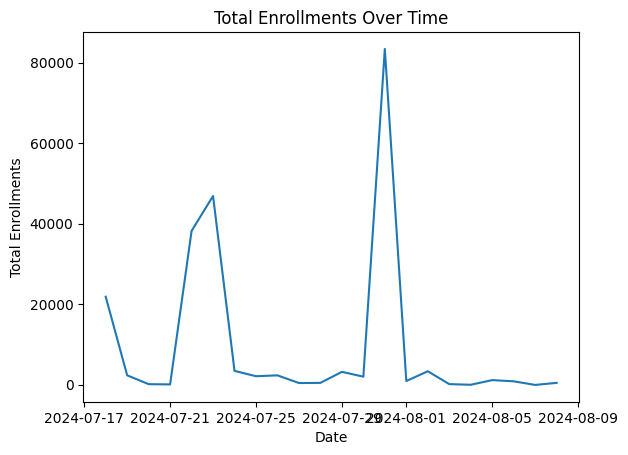

In [11]:
import matplotlib.pyplot as plt

# Group the data by date and calculate the sum of delta_enrolled
enrollments_over_time = inscriptions.groupby(inscriptions['current_time'].dt.date)['delta_enrolled'].sum()

# Create the line plot
enrollments_over_time.plot(kind='line')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Total Enrollments')
plt.title('Total Enrollments Over Time')

# Display the plot
plt.show()


In [12]:
# Group the data by date and calculate the sum of delta_enrolled
enrollments_over_time = inscriptions.groupby(inscriptions['current_time'].dt.date)['delta_enrolled'].sum()
enrollments_over_time

current_time
2024-07-18    21843
2024-07-19     2295
2024-07-20       97
2024-07-21       31
2024-07-22    38197
2024-07-23    46882
2024-07-24     3398
2024-07-25     2070
2024-07-26     2286
2024-07-27      381
2024-07-28      417
2024-07-29     3158
2024-07-30     1961
2024-07-31    83447
2024-08-01      883
2024-08-02     3301
2024-08-03      109
2024-08-04      -53
2024-08-05     1103
2024-08-06      807
2024-08-07      -92
2024-08-08      420
Name: delta_enrolled, dtype: int64

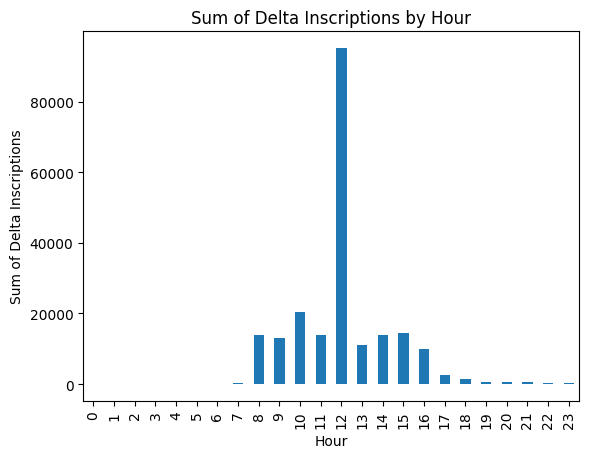

In [13]:
# Extract the hour from the current_time column
inscriptions['hour'] = inscriptions['current_time'].dt.hour

# Sum the delta_enrolled at each hour
hourly_sum = inscriptions.groupby('hour')['delta_enrolled'].sum()

# Create the bar plot
hourly_sum.plot(kind='bar')

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Sum of Delta Inscriptions')
plt.title('Sum of Delta Inscriptions by Hour')

# Display the plot
plt.show()


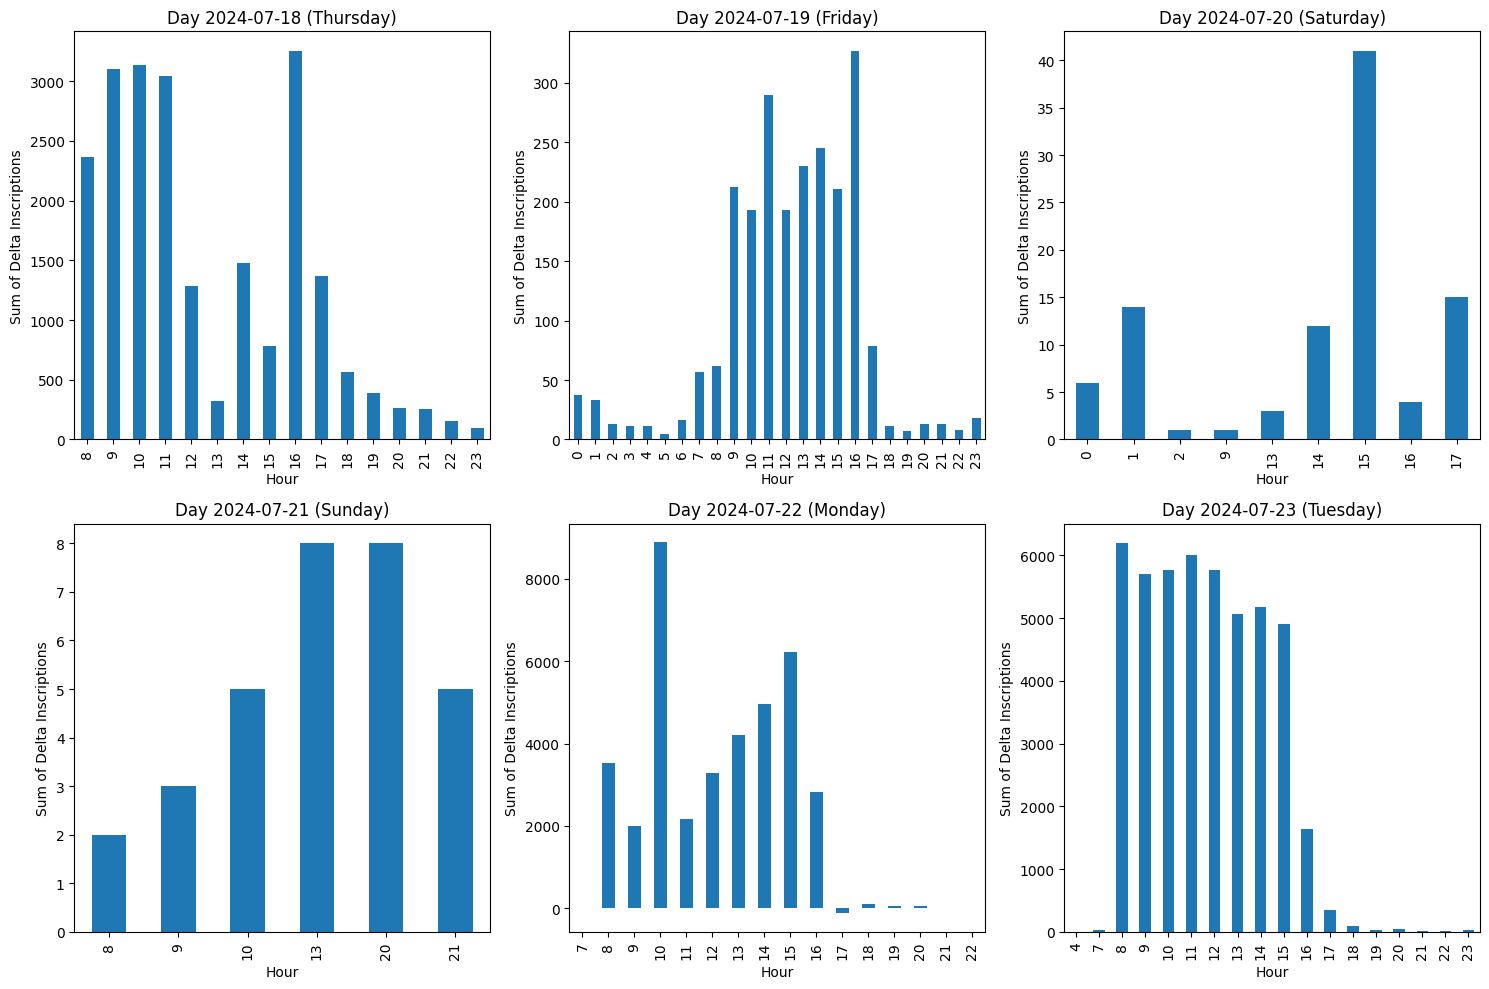

In [14]:
# Create a subplot with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the subplots and plot the data
for i, ax in enumerate(axs.flatten()):
    # Filter the data for the current day
    day_data = inscriptions[inscriptions['current_time'].dt.date == (inscriptions['current_time'].dt.date.min() + pd.DateOffset(days=i)).date()]
    
    # Group the data by hour and calculate the sum of delta_enrolled
    hourly_sum = day_data.groupby('hour')['delta_enrolled'].sum()
    
    # Create the bar plot
    hourly_sum.plot(kind='bar', ax=ax)

    day_str = (inscriptions['current_time'].dt.date.min() + pd.DateOffset(days=i)).date().strftime('%Y-%m-%d')
    day_of_the_week = (inscriptions['current_time'].dt.date.min() + pd.DateOffset(days=i)).date().strftime('%A')
    
    # Set the labels and title for each subplot
    ax.set_xlabel('Hour')
    ax.set_ylabel('Sum of Delta Inscriptions')
    ax.set_title(f'Day {day_str} ({day_of_the_week})')
    
# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


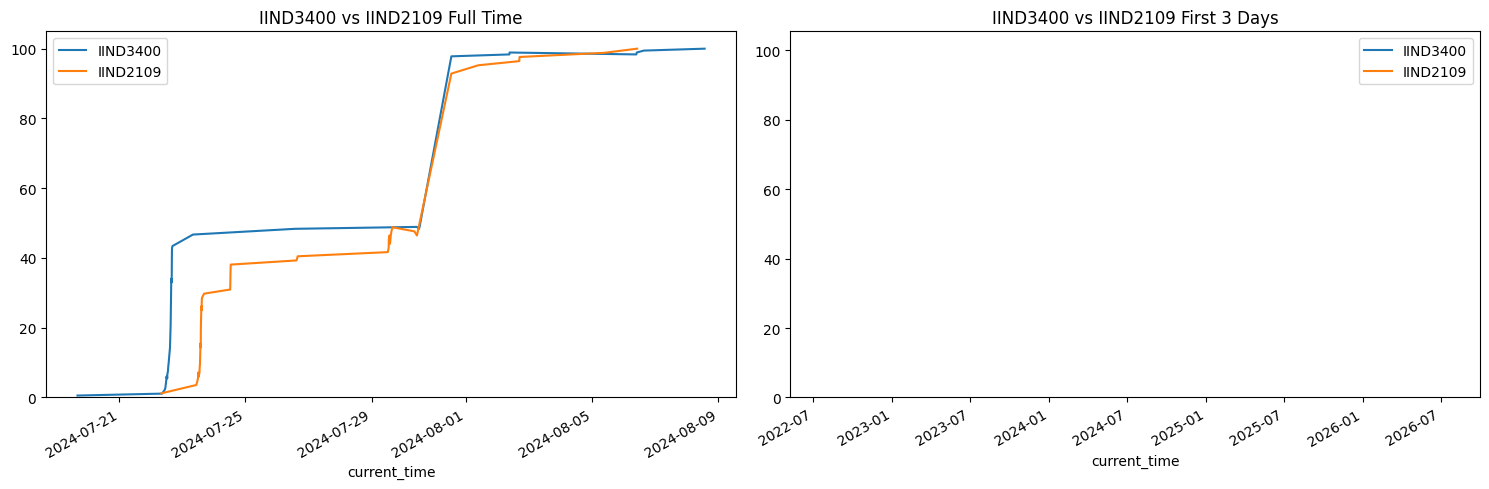

In [15]:
def plot_course_inscriptions(course_code, date_range=None):
    # Extract the class and course from the course_code
    course_class, course_course = course_code[:4], course_code[4:]
    
    # Filter the data for the course
    course_data = courses[(courses['class'] == course_class) & (courses['course'] == course_course)]
    course_nrc = course_data.nrc.values[0]

    # Filter the inscriptions data for the course
    course_inscriptions = inscriptions[inscriptions['nrc'] == course_nrc].copy()
    
    if date_range:
        # Filter the data if in date_range
        start_time, end_time = date_range[0], date_range[1]
        course_inscriptions = course_inscriptions[(course_inscriptions['current_time'] >= start_time) & (course_inscriptions['current_time'] <= end_time)]
    
    course_inscriptions['cumulative_enrolled'] = course_inscriptions['delta_enrolled'].cumsum() + course_data['enrolled'].values[0]

    # Normalize as percentage
    course_inscriptions['cumulative_enrolled'] = course_inscriptions['cumulative_enrolled'] / course_inscriptions['cumulative_enrolled'].max() * 100

    course_inscriptions.plot(x='current_time', y='cumulative_enrolled', kind='line', ax=plt.gca(), label=course_code)


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

course_code_1 = 'IIND3400'
course_code_2 = 'IIND2109'

# Call plot_course_inscriptions for full time 
plt.sca(axs[0])
axs[0].set_title(f'{course_code_1} vs {course_code_2} Full Time')
plot_course_inscriptions('IIND3400')
plot_course_inscriptions('IIND2109')
axs[0].set_ylim(bottom=0) 

# Call plot_course_inscriptions for first 3 days 
plt.sca(axs[1])
axs[1].set_title(f'{course_code_1} vs {course_code_2} First 3 Days')
date_range = (inscriptions['current_time'].min(), inscriptions['current_time'].min() + pd.DateOffset(days=3))
plot_course_inscriptions('IIND3400', date_range=date_range)
plot_course_inscriptions('IIND2109', date_range=date_range)
axs[1].set_ylim(bottom=0)

# Adjust the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

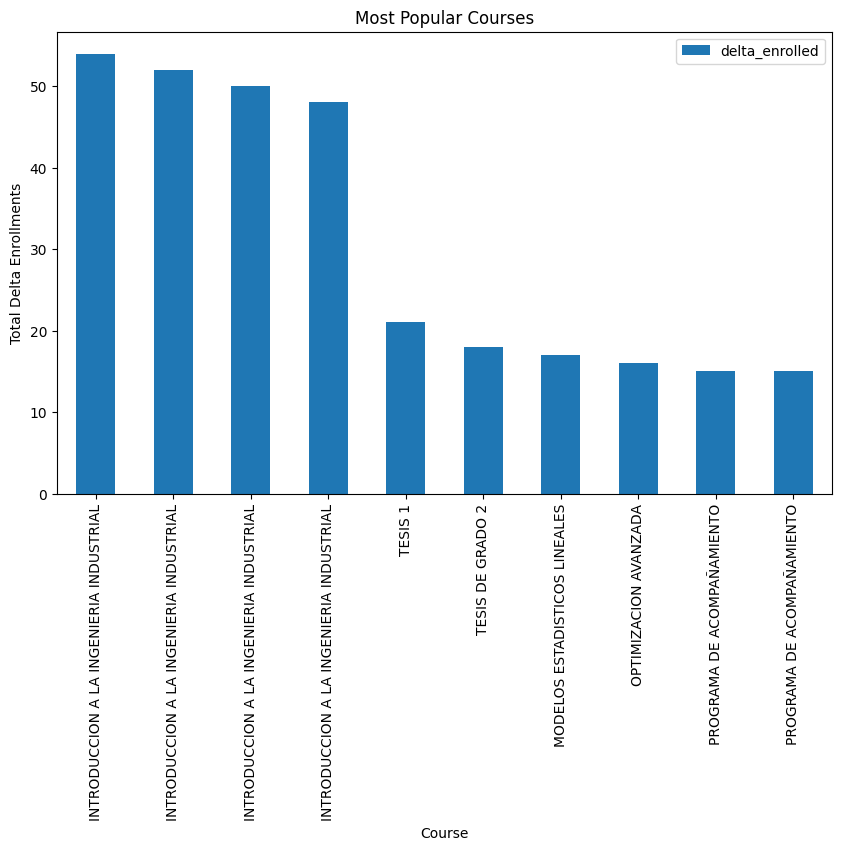

In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a slider for selecting the datetime range
start_date = inscriptions['current_time'].min()
end_date = start_date + pd.DateOffset(days=3)

options = pd.date_range(start=start_date, end=end_date, freq='H')
initial_selection = (0, len(options) - 1)

date_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=initial_selection,
    description='Datetime Range:',
    layout=widgets.Layout(width='75%'),
    readout=False,
)

# Define the display to substitute the readout
date_range_display = widgets.HTML(
    value=(
        f"<b>{options[initial_selection[0]]}" + 
        f" - {options[initial_selection[1]]}</b>"))

# Define the date range using the widgets.HBox
date_range = widgets.HBox(
    (date_range_slider, date_range_display))


#################
courses_class = 'IIND'

# Create a function to update the plot based on the selected datetime range
def update_plot(datetime_range):
    start_datetime = datetime_range[0]
    end_datetime = datetime_range[1]
    
    # Filter the inscriptions data for the selected datetime range
    filtered_inscriptions = inscriptions[(inscriptions['current_time'] >= start_datetime) & (inscriptions['current_time'] <= end_datetime)]
    
    # Group the data by course and calculate the sum of delta_enrolled
    popular_courses = filtered_inscriptions.groupby('nrc').agg({'delta_enrolled': 'sum'}).sort_values('delta_enrolled', ascending=False).merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc')

    # Filter the popular courses for the selected class
    popular_courses = popular_courses[popular_courses['class'] == courses_class].head(10)
    
    # Clear the current plot
    clear_output(wait=True)

    # Display the slider
    display(date_range)

    date_range_display.value = f"<b>{start_datetime} - {end_datetime}</b>"

    if len(popular_courses) == 0:
        print('No popular courses found for the selected datetime range.')
        return
    
    # Create the bar plot
    popular_courses.plot(x='title', y='delta_enrolled', kind='bar', figsize=(10, 6))
    
    # Set the labels and title
    plt.xlabel('Course')
    plt.ylabel('Total Delta Enrollments')
    plt.title('Most Popular Courses')
    
    # Display the plot
    plt.show()


# Call the update_plot function with the initial datetime range
update_plot(date_range_slider.value)

# Create an observer to update the plot when the slider value changes
date_range_slider.observe(lambda change: update_plot(change.new), 'value')


In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget for entering the NRC
nrc_input = widgets.Text(
    value='',
    placeholder='Enter NRC',
    description='NRC:',
    layout=widgets.Layout(width='200px')
)

# Create a button widget for triggering the plot
plot_button = widgets.Button(description='Plot')

# Define a function to handle the button click event
def plot_button_clicked(b):
    nrc = nrc_input.value
    
    # Filter the data for the given NRC
    filtered_data = inscriptions[inscriptions['nrc'] == int(nrc)]
    
    # Calculate the cumulative sum of delta_enrolled
    filtered_data['cumulative_enrolled'] = filtered_data['delta_enrolled'].cumsum()
    
    # Get the maxenrol for the given NRC from the courses dataframe
    maxenrol = courses[courses['nrc'] == int(nrc)]['maxenrol'].values[0]
    
    # Create the interactive line plot using Plotly Express
    fig = px.line(filtered_data, x='current_time', y='cumulative_enrolled', title=f'Cumulative Enrolled for NRC: {nrc}')
    
    # Add a horizontal line for the maxenrol
    fig.add_hline(y=maxenrol, line_dash='dash', line_color='red', annotation_text=f'Max Enroll: {maxenrol}', annotation_position='bottom right')
    
    fig.show()

# Attach the button click event handler
plot_button.on_click(plot_button_clicked)

# Display the widgets
display(nrc_input, plot_button)


Text(value='', description='NRC:', layout=Layout(width='200px'), placeholder='Enter NRC')

Button(description='Plot', style=ButtonStyle())

C:\Users\hfons\AppData\Local\Temp\ipykernel_10596\9121345.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'Number of Courses by Days of the Week'}, xlabel='days_of_the_week'>

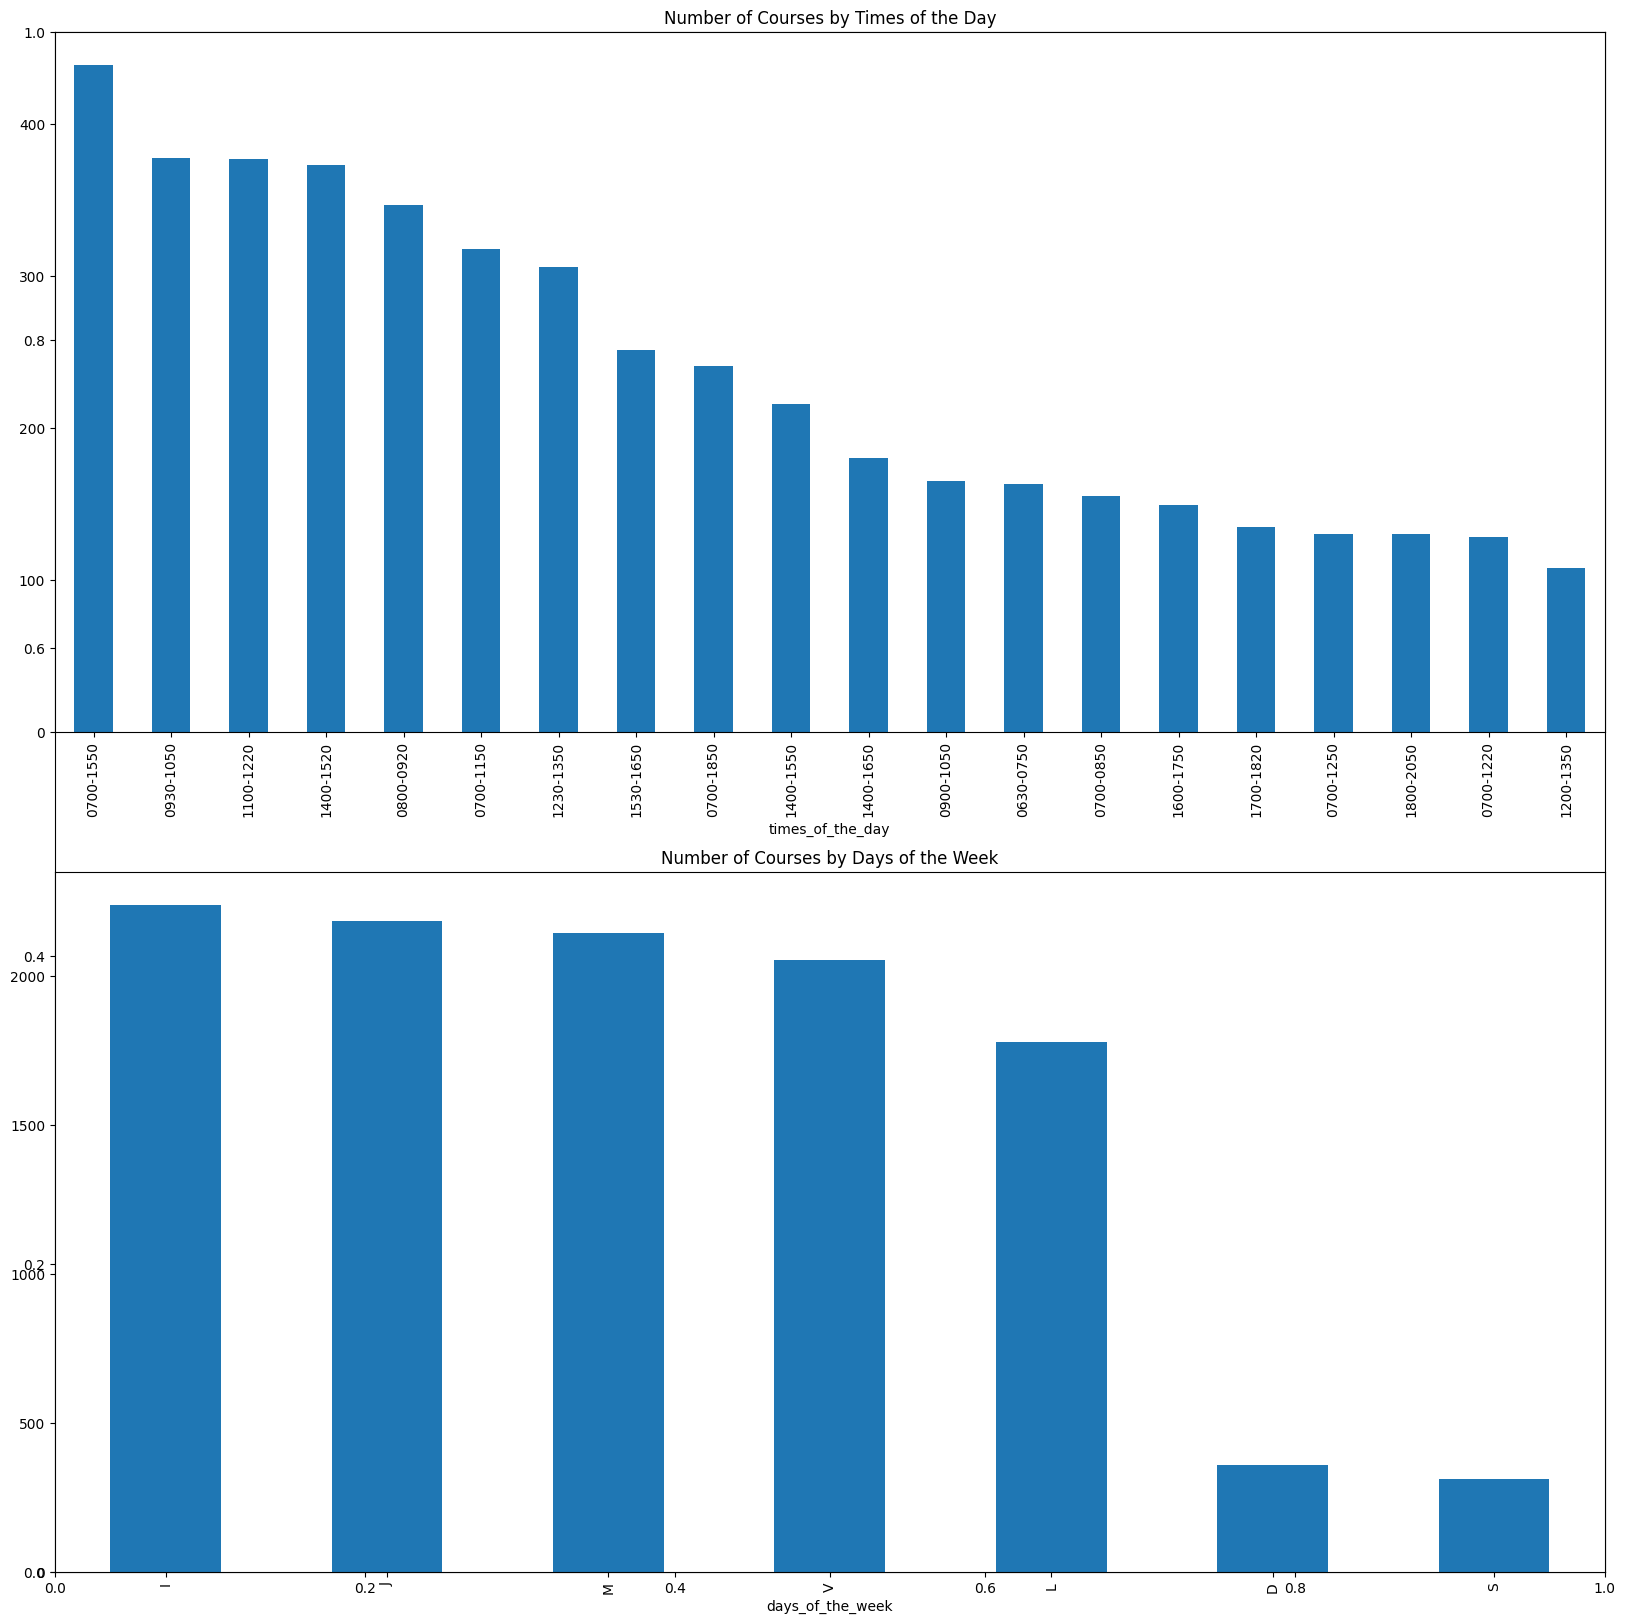

In [ ]:
courses['times_of_the_day'] = courses['schedules'].apply(lambda schedule: set(f"{data['time_ini']}-{data['time_fin']}" for data in schedule if data['time_ini'] and data['time_fin']))
courses['days_of_the_week'] = courses['schedules'].apply(lambda schedule: set(data[day] for data in schedule for day in ['l','m','i','j','v','s','d'] if data[day]))

plt.subplots(figsize=(20, 20))

# Plot the number of courses by times_of_the_day
plt.subplot(2, 1, 1)
times_of_the_day_counts = courses['times_of_the_day'].explode().value_counts()[:20]
times_of_the_day_counts.plot(kind='bar', title='Number of Courses by Times of the Day')

# Plot the number of courses by days_of_the_week
plt.subplot(2, 1, 2)
days_of_the_week_counts = courses['days_of_the_week'].explode().value_counts()
days_of_the_week_counts.plot(kind='bar', title='Number of Courses by Days of the Week')

In [ ]:
inscriptions_copy = inscriptions.copy()

time_to_full = []

# Calculate the cumulative sum of delta_enrolled for each nrc
for nrc in inscriptions_copy['nrc'].unique():

    if not nrc in courses['nrc'].values:
        print(f'NRC {nrc} not found in courses dataframe')
        continue

    # Get the initial value of enrolled for each nrc
    initial_value = courses.loc[courses['nrc'] == nrc, 'enrolled'].values[0]

    cumulative_enrolled = inscriptions_copy.loc[inscriptions_copy['nrc'] == nrc][['current_time', 'delta_enrolled']]
    cumulative_enrolled.set_index('current_time', inplace=True)
    cumulative_enrolled = cumulative_enrolled['delta_enrolled'].cumsum() + initial_value

    maxenrol = courses.loc[courses['nrc'] == nrc, 'maxenrol'].values[0]
    
    # Filter the rows where cumulative_enrolled is greater than or equal to maxenrol
    filtered_inscriptions = cumulative_enrolled[cumulative_enrolled >= maxenrol]

    # Get the timestamp at which the condition is met for each nrc
    timestamp = filtered_inscriptions.index[0] if len(filtered_inscriptions) > 0 else None

    time_to_full.append([nrc, timestamp])

# Create a DataFrame from the time_to_full list
time_to_full = pd.DataFrame(time_to_full, columns=['nrc', 'time_to_full'])
time_to_full.set_index('nrc', inplace=True)


NRC 73436 not found in courses dataframe
NRC 44754 not found in courses dataframe
NRC 44755 not found in courses dataframe
NRC 44756 not found in courses dataframe
NRC 44757 not found in courses dataframe
NRC 51817 not found in courses dataframe
NRC 51818 not found in courses dataframe
NRC 51819 not found in courses dataframe
NRC 51820 not found in courses dataframe
NRC 51821 not found in courses dataframe
NRC 51822 not found in courses dataframe
NRC 51709 not found in courses dataframe
NRC 51710 not found in courses dataframe
NRC 51711 not found in courses dataframe
NRC 51712 not found in courses dataframe
NRC 51713 not found in courses dataframe
NRC 51714 not found in courses dataframe
NRC 51715 not found in courses dataframe
NRC 63472 not found in courses dataframe
NRC 63469 not found in courses dataframe
NRC 63468 not found in courses dataframe
NRC 63466 not found in courses dataframe
NRC 58300 not found in courses dataframe
NRC 58301 not found in courses dataframe
NRC 58304 not fo

In [ ]:
time_to_full

,time_to_full
nrc,
39342,2024-07-22 09:32:51
65779,2024-07-31 12:45:35
52118,2024-07-18 08:37:19
66873,2024-07-18 10:17:00
52136,2024-07-18 10:03:14
...,...
70325,2024-08-06 17:38:56
70281,2024-08-06 17:42:51
70273,2024-08-06 17:48:40


In [ ]:
# Select a random nrc from time_to_full where it is not NaT and plot the cumulative enrolled
nrc = time_to_full[time_to_full['time_to_full'].notna()].sample(1).index[0]

# Filter the data up to the time_to_full for the selected nrc
filtered_data = inscriptions[inscriptions['nrc'] == nrc].copy()
filtered_data = filtered_data[filtered_data['current_time'] <= time_to_full.loc[nrc, 'time_to_full']]

# Calculate the cumulative sum of delta_enrolled
filtered_data['cumulative_enrolled'] = filtered_data['delta_enrolled'].cumsum() + courses[courses['nrc'] == int(nrc)]['enrolled'].values[0]

# Get the maxenrol for the given NRC from the courses dataframe
maxenrol = courses[courses['nrc'] == int(nrc)]['maxenrol'].values[0]

# Create the interactive line plot using Plotly Express
fig = px.line(filtered_data, x='current_time', y='cumulative_enrolled', title=f'Cumulative Enrolled for NRC: {nrc} - {courses[courses["nrc"] == int(nrc)]["title"].values[0]}')

# Add a horizontal line for the maxenrol
fig.add_hline(y=maxenrol, line_dash='dash', line_color='red', annotation_text=f'Max Enroll: {maxenrol}', annotation_position='bottom right')

fig.show()

In [ ]:
# Find the courses with the lowest time_to_full
quickest = time_to_full[time_to_full['time_to_full'].notna()].sort_values('time_to_full').merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc')

# Filter those with more than 20 inscriptions (maxenrol)
quickest = quickest[quickest['nrc'].apply(lambda nrc: courses[courses['nrc'] == nrc]['maxenrol'].values[0] >= 20)]
quickest.head(50)

,time_to_full,class,course,title,nrc
2685,2024-07-18 08:52:46,ESCR,1102,ESCRITURA UNIVERSITARIA II (CICLO 2 DE 8 SEMANAS),51665
2703,2024-07-18 09:02:19,ESCR,1102,ESCRITURA UNIVERSITARIA II (CICLO 2 DE 8 SEMANAS),66148
1812,2024-07-18 09:08:06,DISO,1000,CAPACITACIÓN PARA EL USO DE LOS TALLERES Y LAB...,42739
4826,2024-07-18 09:08:06,MATE,1201,PRECÁLCULO,62980
4139,2024-07-18 09:08:06,ISIS,1221,INTRODUCCIÓN A LA PROGRAMACIÓN,68978
4106,2024-07-18 09:11:56,ISIS,1001,INTRODUCCION A LA INGENIERIA DE SISTEMAS,65848
4824,2024-07-18 09:11:56,MATE,1201,PRECÁLCULO,58812
2591,2024-07-18 09:17:43,ESCR,1101,ESCRITURA UNIVERSITARIA I (CICLO 1 DE 8 SEMANAS),51555
2590,2024-07-18 09:17:43,ESCR,1101,ESCRITURA UNIVERSITARIA I (CICLO 1 DE 8 SEMANAS),51554
4158,2024-07-18 09:17:43,ISIS,1221,INTRODUCCIÓN A LA PROGRAMACIÓN,38790


In [ ]:
# Find the CBU courses with the lowest time_to_full
quickest = time_to_full[time_to_full['time_to_full'].notna()].sort_values('time_to_full').merge(courses[['class', 'course', 'title', 'nrc']], left_index=True, right_on='nrc')
# Filter by class == "CBCA", "CBPC", "CBCO"
quickest = quickest[quickest['class'].apply(lambda class_: class_ in ["CBCA", "CBPC", "CBCO"])]
quickest.head(50)

,time_to_full,class,course,title,nrc
753,2024-07-22 10:32:14,CBCA,1037,"CINE, SERIES Y PERIODISMO (TIPO E - CICLO 1 DE...",34013
756,2024-07-22 10:32:14,CBCA,1061,HISTORIA DEL TRAJE EN OCCIDENTE (TIPO E),34022
768,2024-07-22 11:53:28,CBCA,1130,TEORÍAS DEL HUMOR (TIPO E - CICLO 1 DE 8 SEMANAS),71907
774,2024-07-22 12:33:03,CBCA,1156,APRECIACIÓN DE LA MÚSICA (CICLO 1 DE 8 SEMANAS),39625
983,2024-07-22 13:27:12,CBPC,1083,"JUEGOS, REDES Y COMPLEJIDAD (CICLO 1 DE 8 SEMA...",64088
773,2024-07-22 14:33:47,CBCA,1155,APRECIACIÓN DEL BLUES Y ROCK CONTEMPORÁNEO (CI...,42981
751,2024-07-22 15:38:53,CBCA,1027,NUEVOS MEDIOS (CICLO 1 DE 8 SEMANAS),55045
755,2024-07-22 16:08:00,CBCA,1059,CINE Y CRIMEN (CICLO 1 DE 8 SEMANAS),71895
757,2024-07-22 16:27:07,CBCA,1063,"RE-IMAGINAR EL ESPACIO ""UNA VENTANA AL FUTURO""",71896
982,2024-07-23 08:02:17,CBPC,1058,LAS PLANTAS Y EL HOMBRE (CICLO 1 DE 8 SEMANAS),34128


<Axes: title={'center': 'Days to Full'}, ylabel='Frequency'>

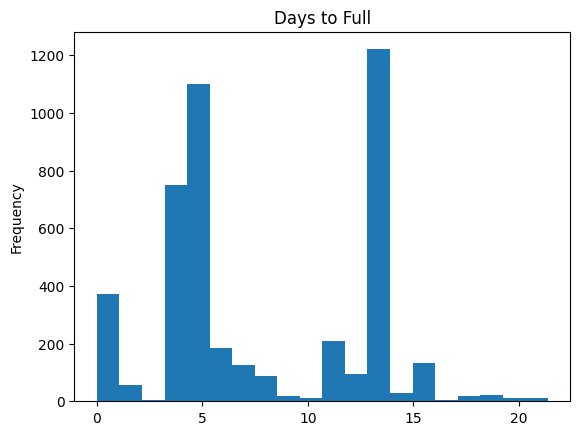

In [ ]:
# How much time until full?
# Calculate time between time_to_full and first current_time
time_to_full['duration_to_full'] = time_to_full['time_to_full'] - inscriptions['current_time'].min()
time_to_full['duration_to_full'].describe()
# Histogram of minutes to full
time_to_full['duration_to_full'].dt.total_seconds().div(3600*24).plot(kind='hist', bins=20, title='Days to Full')

<Axes: title={'center': 'Average Time to Full by Day of the Week'}>

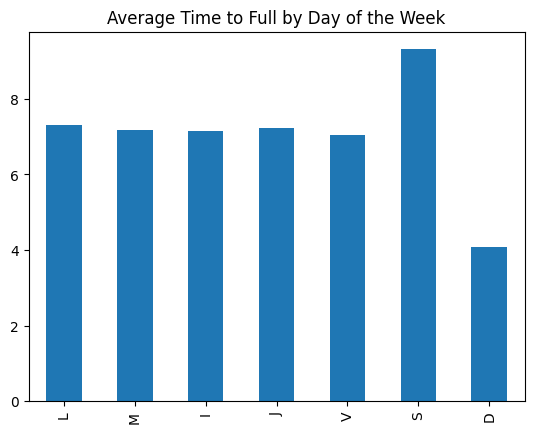

In [ ]:
# Does time to full depend on the day of the week?
# Merge with courses['days_of_the_week'] (explode)
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')


# Calculate the average time to full for each day of the week
avg_time_to_full = {}
for day in ['L', 'M', 'I', 'J', 'V', 'S', 'D']:
    # Filter wich nrcs have the day
    nrcs = time_to_full_with_courses[time_to_full_with_courses['days_of_the_week'].apply(lambda days: day in days)]
    # Calculate the average time to full for those nrcs
    avg_time = nrcs['duration_to_full'].dt.total_seconds().div(3600*24).mean()
    # Save the result
    avg_time_to_full[day] = avg_time

# Create a bar plot
pd.Series(avg_time_to_full).plot(kind='bar', title='Average Time to Full by Day of the Week')

<Axes: title={'center': 'Average Time to Full (days) by Time of the Day'}>

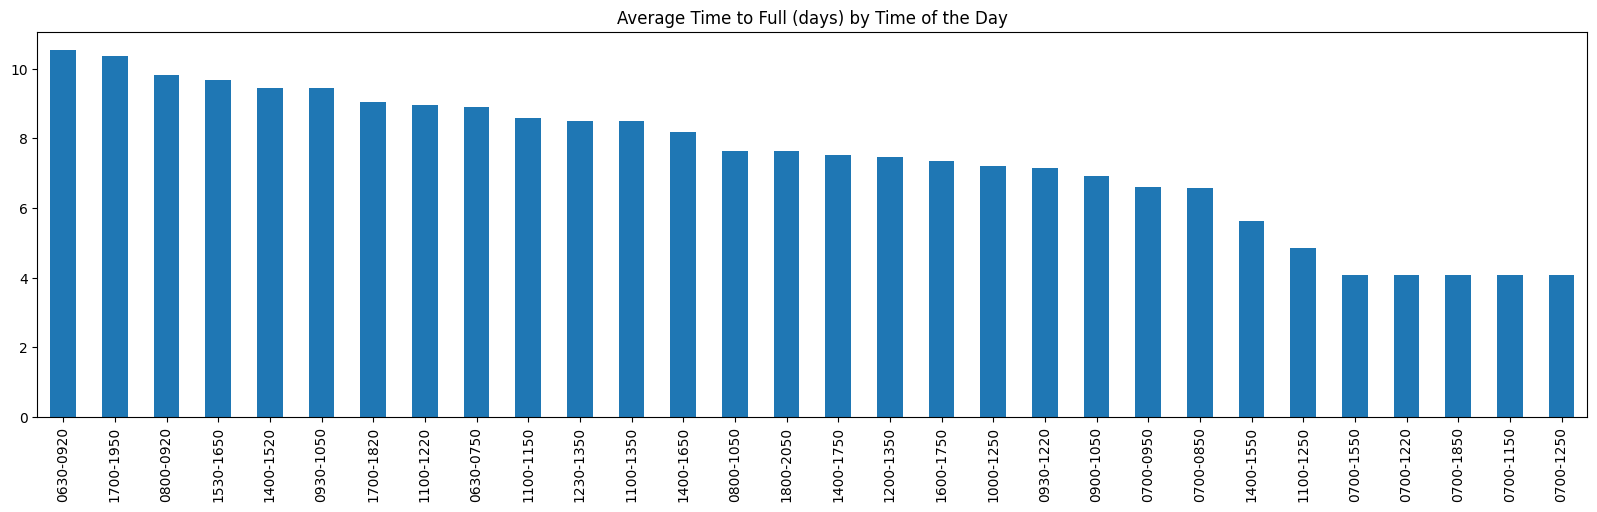

In [ ]:
# Does time to full depend on the time of the day?
# Merge with courses['times_of_the_day'] (explode)
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')

# Calculate the average time to full for each time of the day
avg_time_to_full = {}
for time in time_to_full_with_courses['times_of_the_day'].explode().value_counts()[:30].index:
    # Filter which nrcs have the time of the day
    nrcs = time_to_full_with_courses[time_to_full_with_courses['times_of_the_day'].apply(lambda times: time in times)]
    # Calculate the average time to full for those nrcs
    avg_time = nrcs['duration_to_full'].dt.total_seconds().div(3600*24).mean()
    # Save the result
    avg_time_to_full[time] = avg_time

# Create a bar plot
plt.figure(figsize=(20, 5))
pd.Series(avg_time_to_full).sort_values(ascending=False).plot(kind='bar', title='Average Time to Full (days) by Time of the Day')


<Axes: title={'center': 'Average Time to Full (days) by Class'}, xlabel='class'>

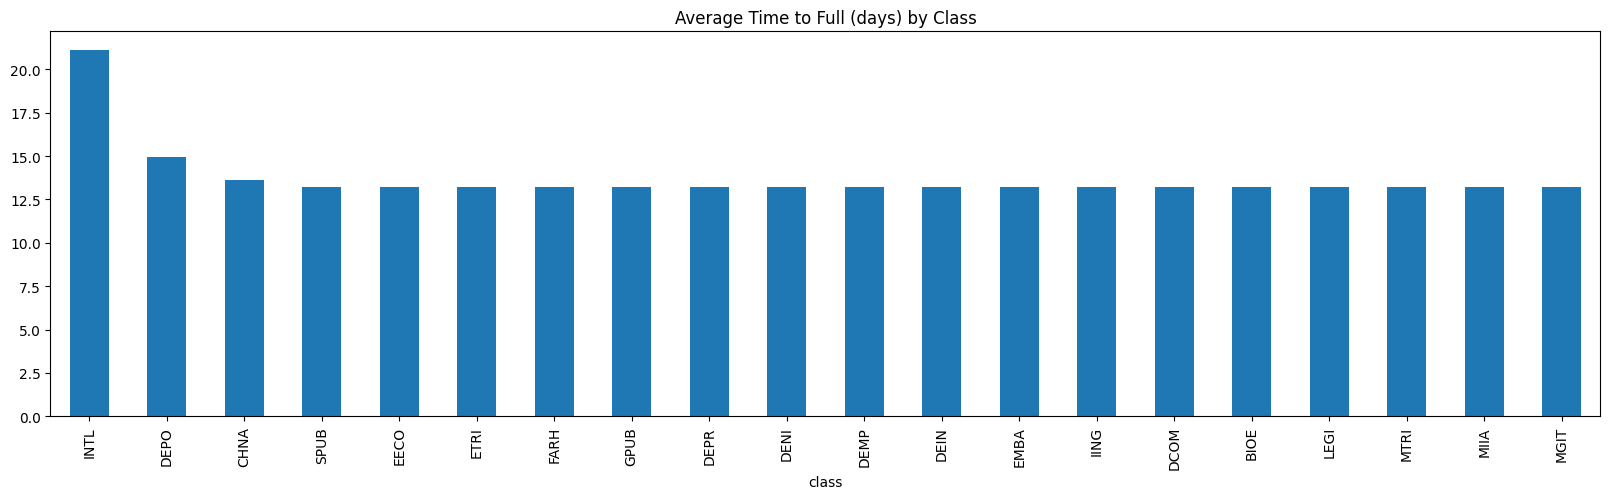

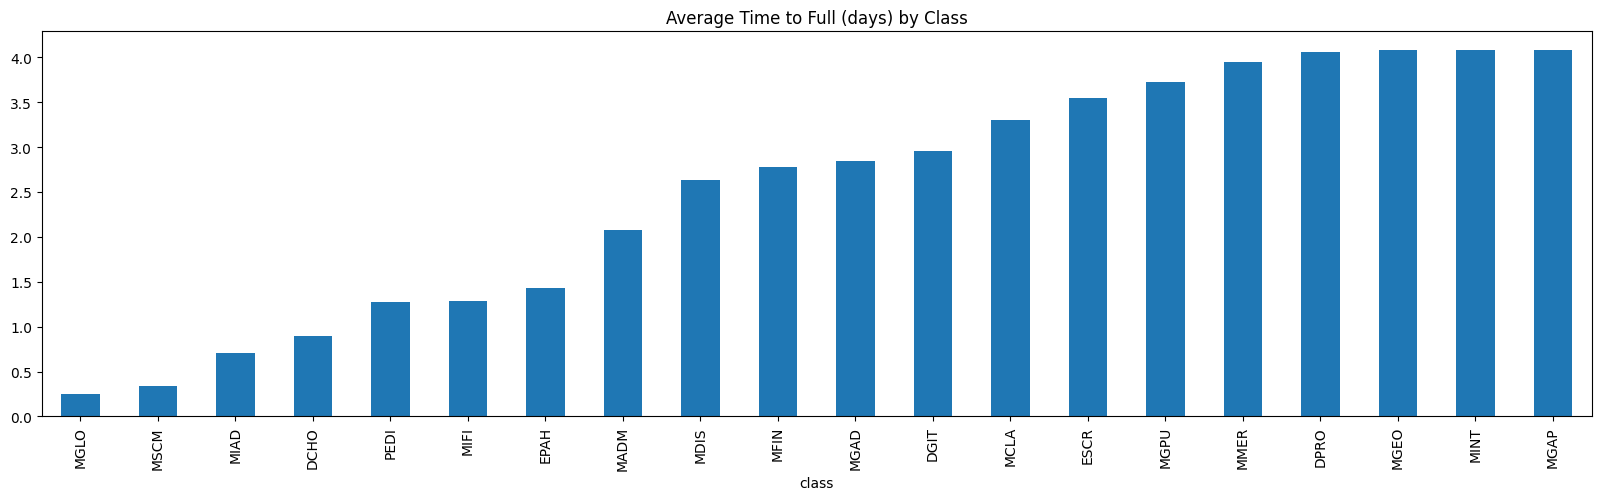

In [ ]:
# Do some courses fill up faster than others? (by 'Class'/department)

# Merge with courses['class']
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')
time_to_full_with_courses['duration_to_full_seconds'] = time_to_full_with_courses['duration_to_full'].dt.total_seconds().div(3600*24)
plt.figure(figsize=(20, 5))
time_to_full_with_courses.groupby('class')['duration_to_full_seconds'].mean().sort_values(ascending=False)[:20].plot(kind='bar', title='Average Time to Full (days) by Class')
plt.figure(figsize=(20, 5))
time_to_full_with_courses.groupby('class')['duration_to_full_seconds'].mean().sort_values(ascending=True)[:20].plot(kind='bar', title='Average Time to Full (days) by Class')

<Axes: title={'center': 'Average Time to Full (days) by Course in IIND'}, xlabel='course'>

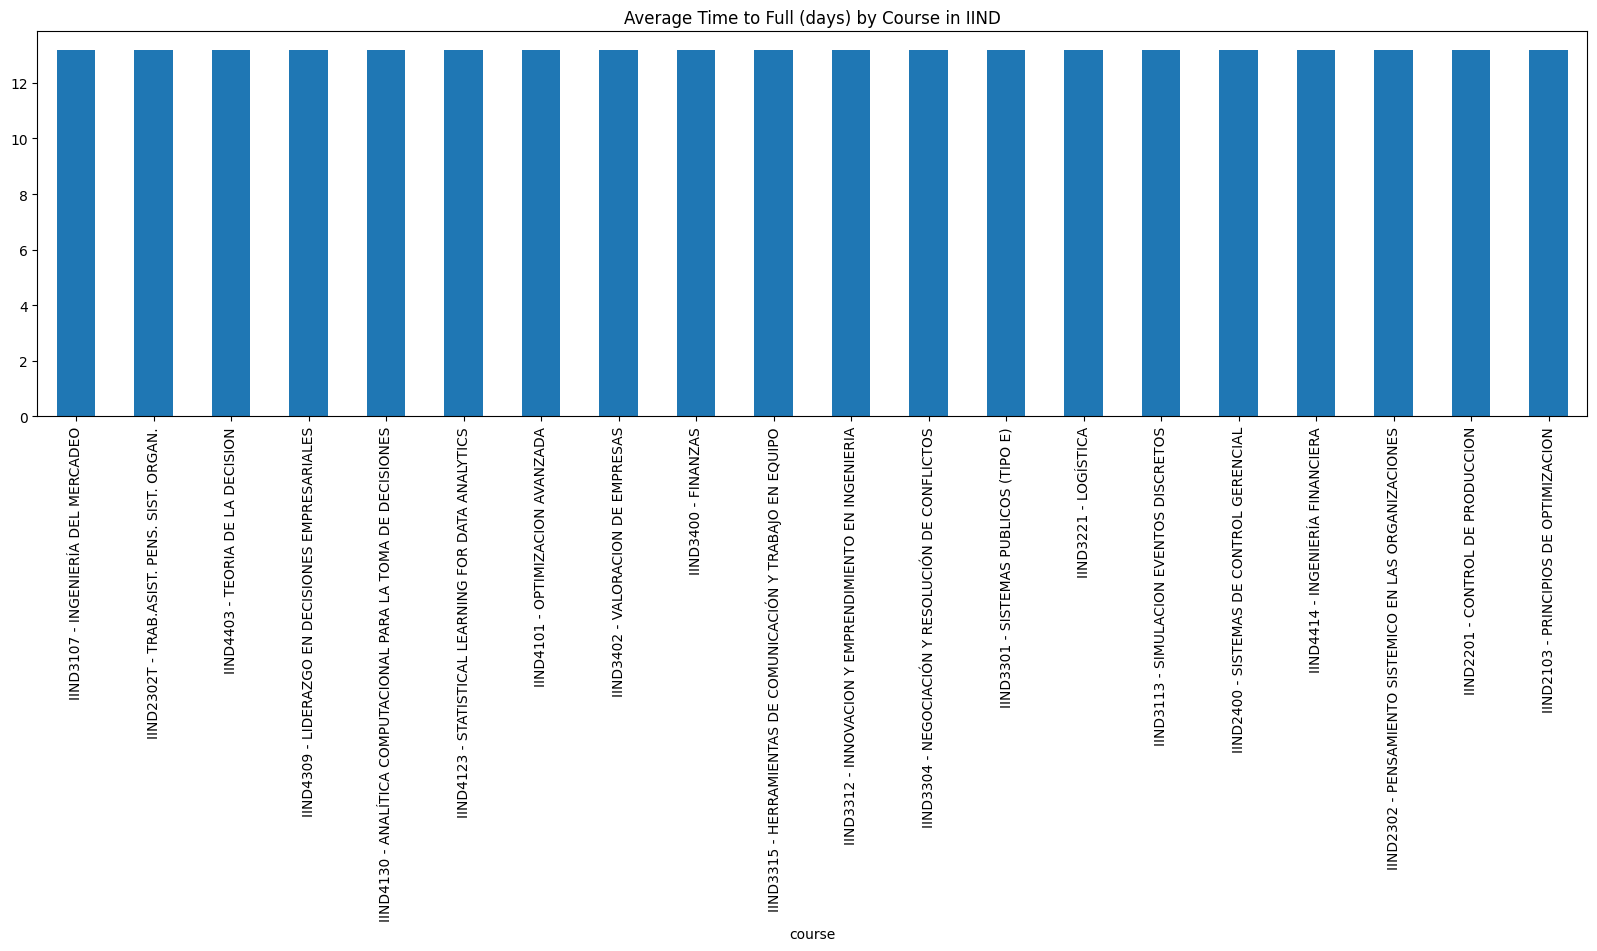

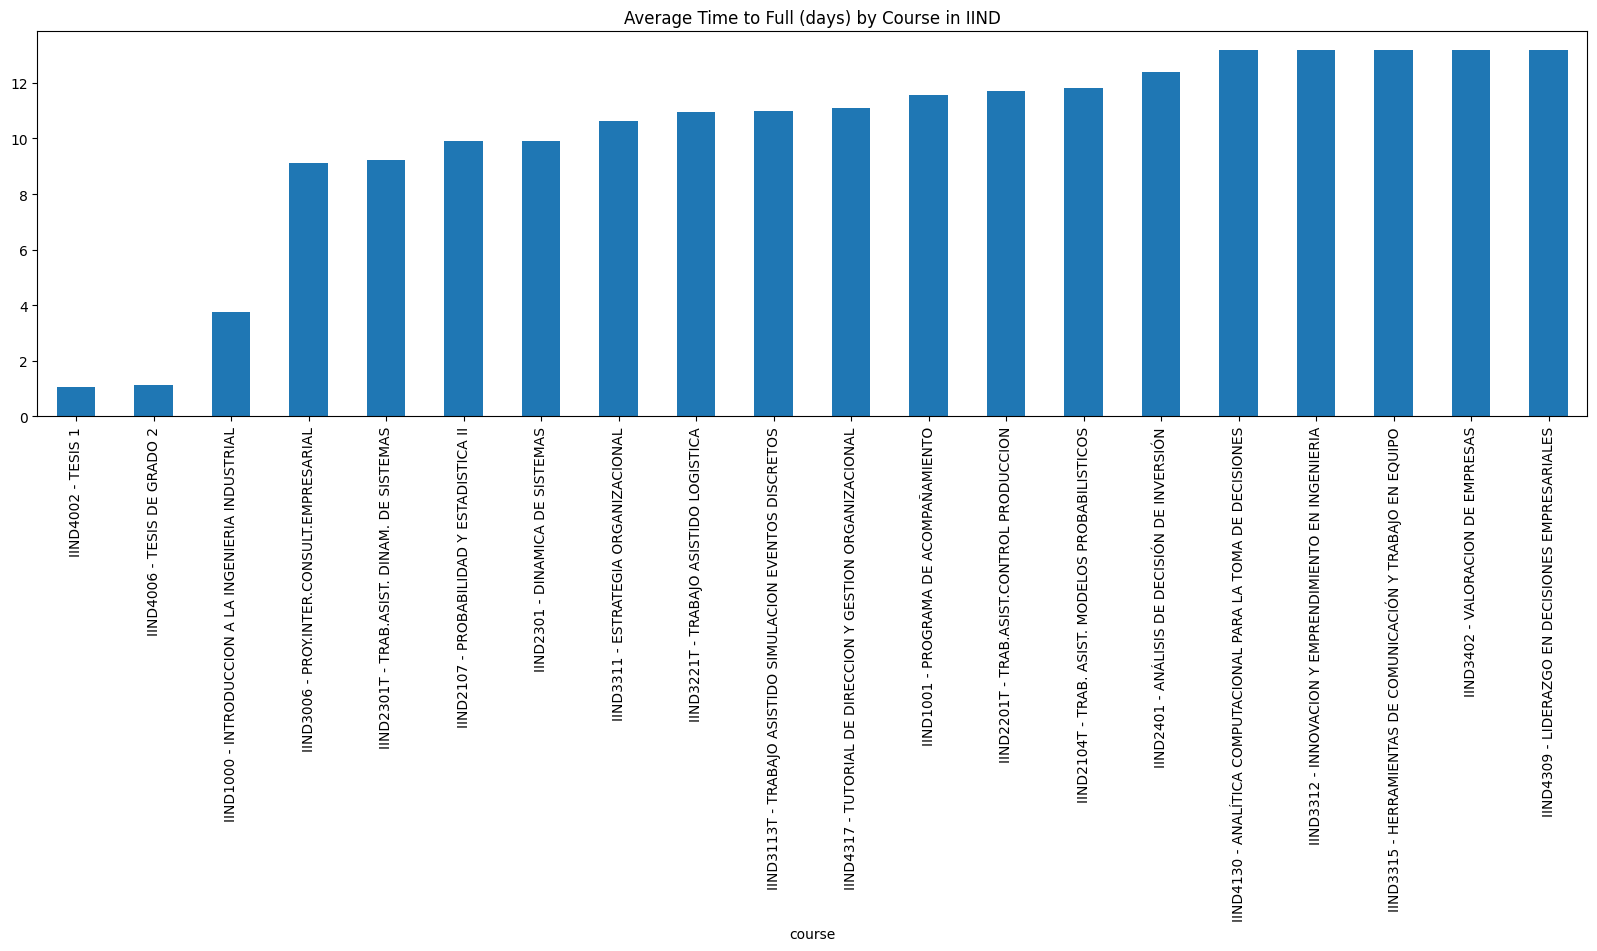

In [ ]:
# # Do some courses fill up faster than others?
# What about inside "IIND"? By "course"

# Merge with courses['course']
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')
time_to_full_with_courses = time_to_full_with_courses[time_to_full_with_courses['class'] == 'IIND']
time_to_full_with_courses['duration_to_full_seconds'] = time_to_full_with_courses['duration_to_full'].dt.total_seconds().div(3600*24)
plt.figure(figsize=(20, 5))
iind_class_series = time_to_full_with_courses.groupby('course')['duration_to_full_seconds'].mean().sort_values(ascending=False)[:20]
iind_class_series.index = iind_class_series.index.map(lambda course: f'IIND{course} - {courses[(courses["course"] == course) & (courses["class"] == "IIND")]["title"].values[0]}')
iind_class_series.plot(kind='bar', title='Average Time to Full (days) by Course in IIND')
plt.figure(figsize=(20, 5))
iind_class_series = time_to_full_with_courses.groupby('course')['duration_to_full_seconds'].mean().sort_values(ascending=True)[:20]
iind_class_series.index = iind_class_series.index.map(lambda course: f'IIND{course} - {courses[(courses["course"] == course) & (courses["class"] == "IIND")]["title"].values[0]}')
iind_class_series.plot(kind='bar', title='Average Time to Full (days) by Course in IIND')

**Spike**
> Are there courses with repeated nrcs?

In [ ]:
# Get courses with repeated nrcs
nrc_counts = courses['nrc'].value_counts()
repeated_nrcs = nrc_counts[nrc_counts > 1].index
repeated_courses = courses[courses['nrc'].isin(repeated_nrcs)]
print(len(repeated_courses))
repeated_courses

0


,llave,nrc,class,course,section,credits,title,maxenrol,enrolled,term,ptrm,ptrmdesc,seatsavail,campus,projenrl,schedules,instructors,attr,times_of_the_day,days_of_the_week


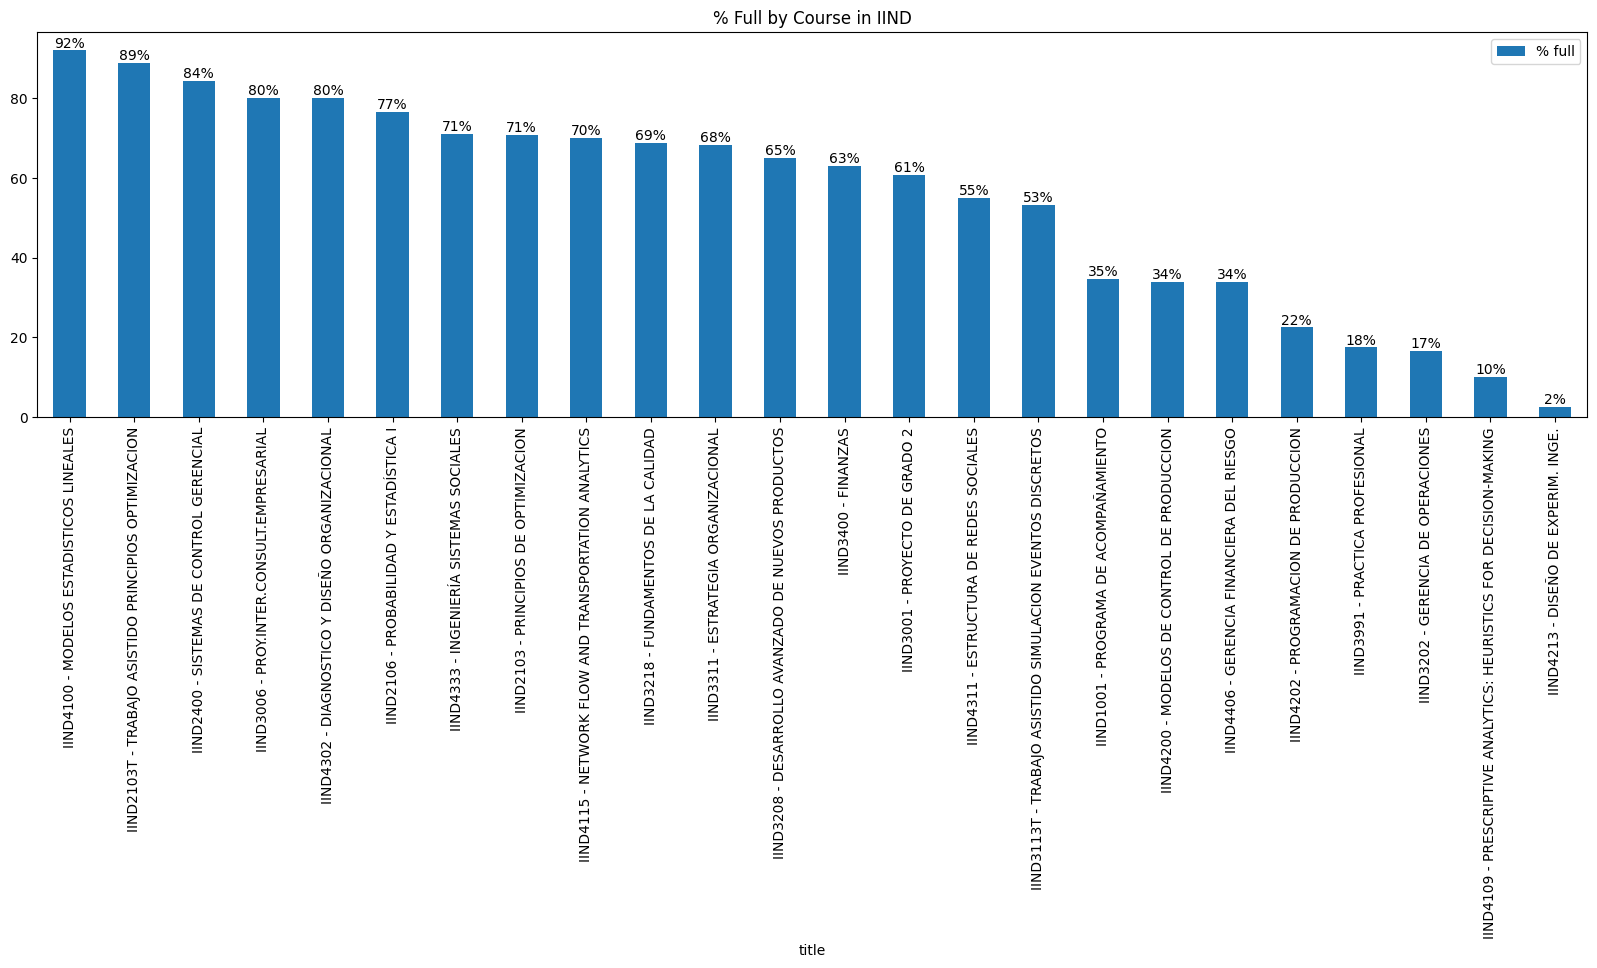

In [ ]:
# Which courses in IIND did not reach full capacity? How far were they?
# Merge with courses['class']
time_to_full_with_courses = time_to_full.merge(courses, left_index=True, right_on='nrc')
time_to_full_with_courses = time_to_full_with_courses[time_to_full_with_courses['class'] == 'IIND'][['duration_to_full', 'nrc', 'maxenrol', 'course']]

# Filter the rows where duration_to_full is NaT
incomplete_courses = time_to_full_with_courses[time_to_full_with_courses['duration_to_full'].isna()].copy()

# Get number of inscriptions for each nrc
incomplete_courses['final_enrolled'] = incomplete_courses['nrc'].apply(lambda nrc: sum(inscriptions[inscriptions['nrc'] == nrc].delta_enrolled) + courses[courses['nrc'] == nrc]['enrolled'].values[0])
incomplete_courses['% full'] = incomplete_courses['final_enrolled'] / incomplete_courses['maxenrol'] * 100
incomplete_courses = incomplete_courses.groupby('course').agg({'% full': 'mean'})
incomplete_courses['title'] = incomplete_courses.index.map(lambda course: f'IIND{course} - {courses[(courses["course"] == course) & (courses["class"] == "IIND")]["title"].values[0]}')

# Create a bar plot
plt.figure(figsize=(20, 5))
incomplete_courses.sort_values('% full', ascending=False).plot(x='title', y='% full', kind='bar', title='% Full by Course in IIND', ax=plt.gca())

# Add the exact percentage to each bar
for i, v in enumerate(incomplete_courses.sort_values('% full', ascending=False)['% full']):
    plt.text(i, v, f'{v:.0f}%', ha='center', va='bottom')